<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml08_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Stochastic Gradient Descent(SGD, 확률적 경사 하강법)

In [2]:
w = np.arange(-5, 5, 0.001)
cost = w**2  # 비용 함수

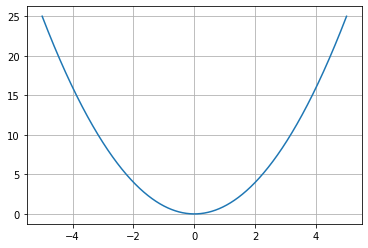

In [3]:
plt.plot(w, cost)

plt.grid()
plt.show()

In [4]:
w_init = -4

In [5]:
w_grad = 2 * w_init

In [6]:
learning_rate = 0.1

In [7]:
w_new = w_init - learning_rate * w_grad

In [8]:
w_new

-3.2

In [9]:
w_init = w_new
w_grad = 2 * w_init
w_new = w_init - learning_rate * w_grad
w_new

-2.56

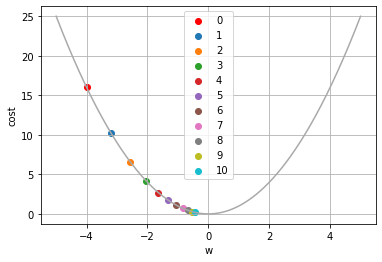

In [33]:
plt.plot(w, cost, color='darkgray')  # 비용 함수 시각화

w_init = -4  # 임의의 w 시작값
cost_init = w_init ** 2
plt.scatter(w_init, cost_init, color='red', label='0')

learning_rate = 0.1 # 학습률(0.2, 0.3, 0.5, 0.8, 1.0, 1.1 테스트)
for epoch in range(10):
    w_grad = 2 * w_init  # 임의의 w에서의 grdient를 계산
    w_new = w_init - learning_rate * w_grad  # 경사 하강법 알고리즘
    cost_new = w_new ** 2
    plt.scatter(w_new, cost_new, label=f'{epoch+1}')
    w_init = w_new

plt.legend()
plt.grid()
plt.xlabel('w')
plt.ylabel('cost')
plt.show()

경사 하강법에서의 학습률(learning rate):

*   학습률이 작은 경우, 최솟값을 향해 천천히 움직임.
*   학습률이 큰 경우, 최솟값을 향해 빠르게 움직이거나 혹은 불안정하게 움직일 수 있음.
*   학습률이 너무 작으면, 최대 반복 횟수(max_iter) 안에서 최솟값으로 수렴(converge)하지 못함.
    * 학습률을 크게 하거나 최대 반복 횟수를 늘려주면 수렴하게 만들 수 있음.
*   학습률이 너무 크면, 최솟값으로 수렴하는 것이 아니라 발산(diverge)하는 경우가 발생할 수도 있음.
*   학습률은 머신 러닝 알고리즘의 성능을 향상시키기 위해서 튜닝하는 하이퍼파라미터 중 하나.
    *   머신 러닝 알고리즘들 중에서는 처음에는 학습률을 크게 하고, 에포크가 진행될 때마다 학습률을 점점 작게 줄이는 방식으로 조정하는 알고리즘도 있음.


# SGDClassifier